Summary statistics for numerical features:
              Price       Rooms      Surface   Log_Price
count  4.020000e+02  402.000000   402.000000  402.000000
mean   9.336450e+04    1.893035   145.246588    8.248788
std    4.541931e+05    1.225661   308.695749    2.456166
min    1.000000e+00    0.000000     1.000000    0.693147
25%    9.000000e+02    1.000000    73.015500    6.803505
50%    1.425000e+03    2.000000   103.500000    7.262475
75%    5.000000e+03    3.000000   159.250000    8.517393
max    8.500000e+06    7.000000  5800.000000   15.955577


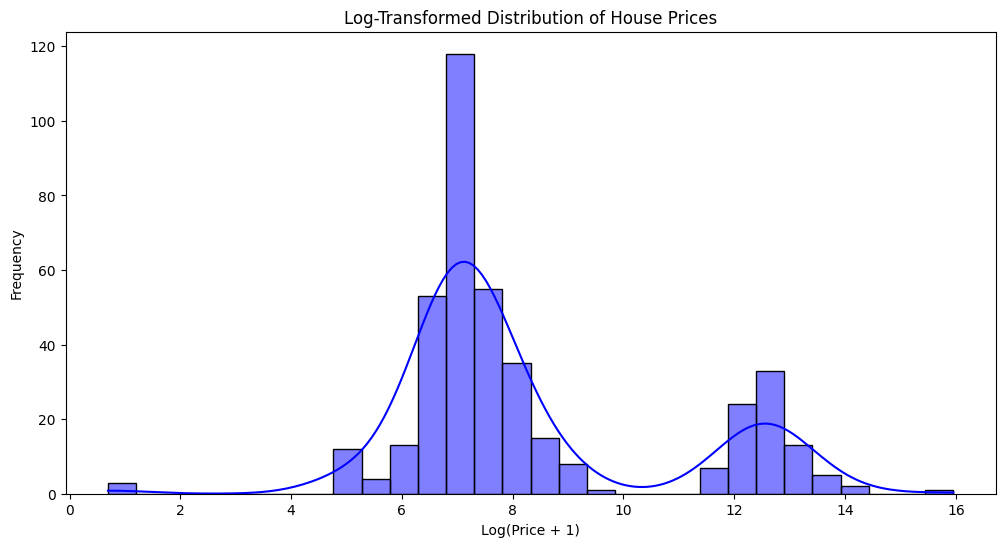

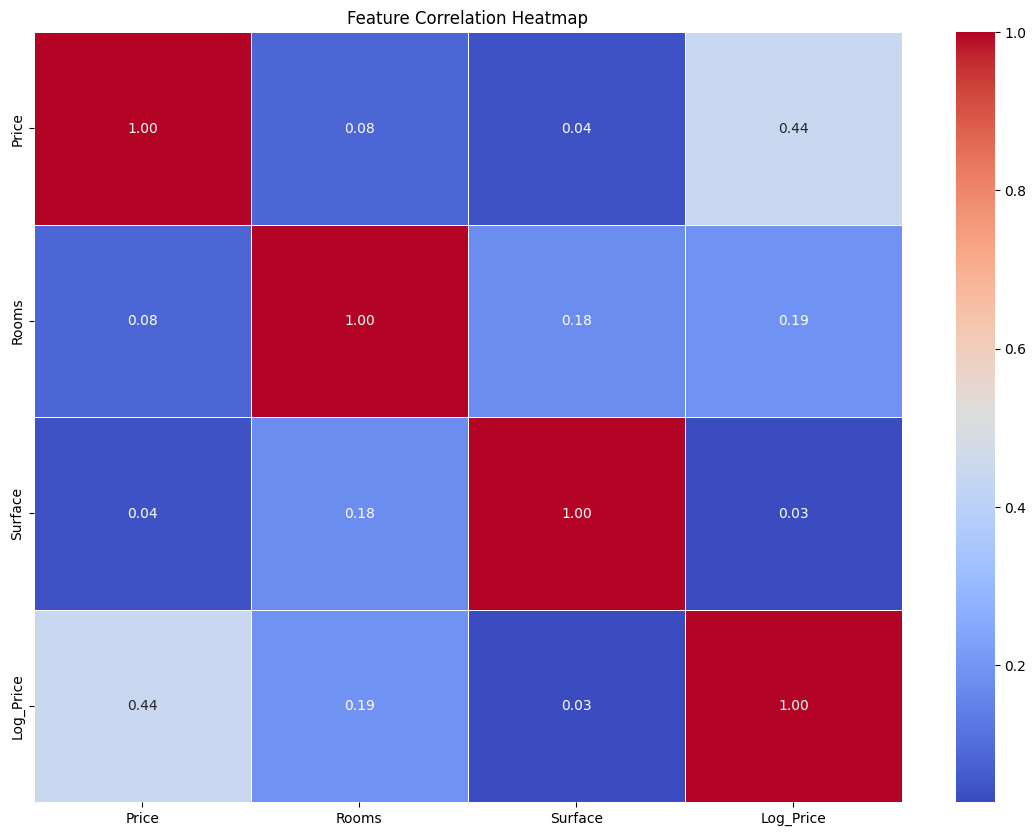

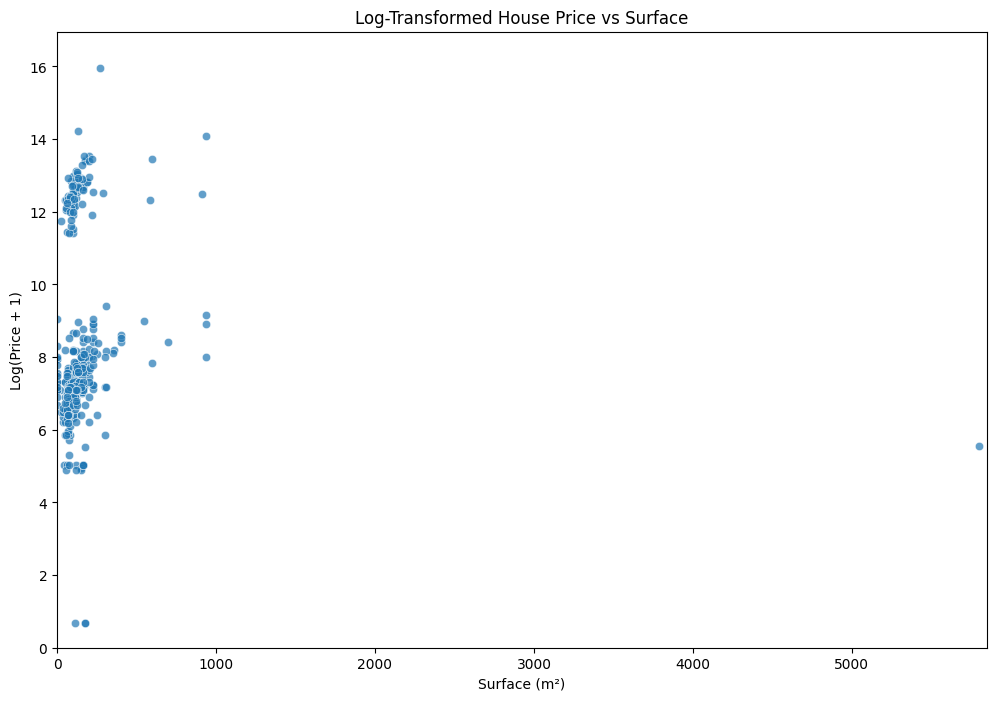

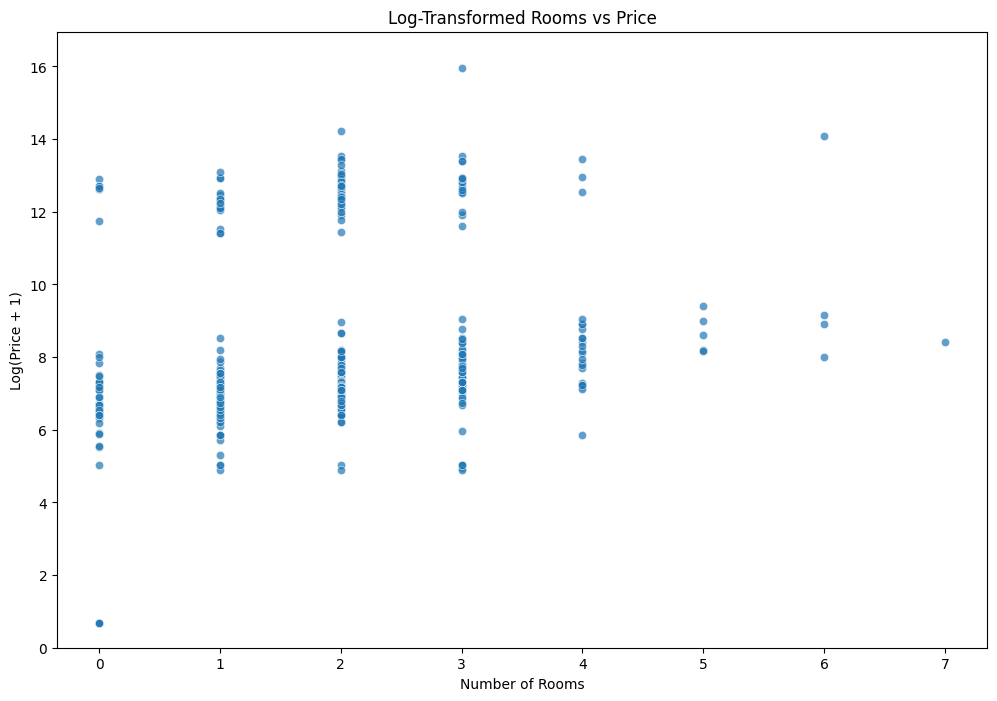

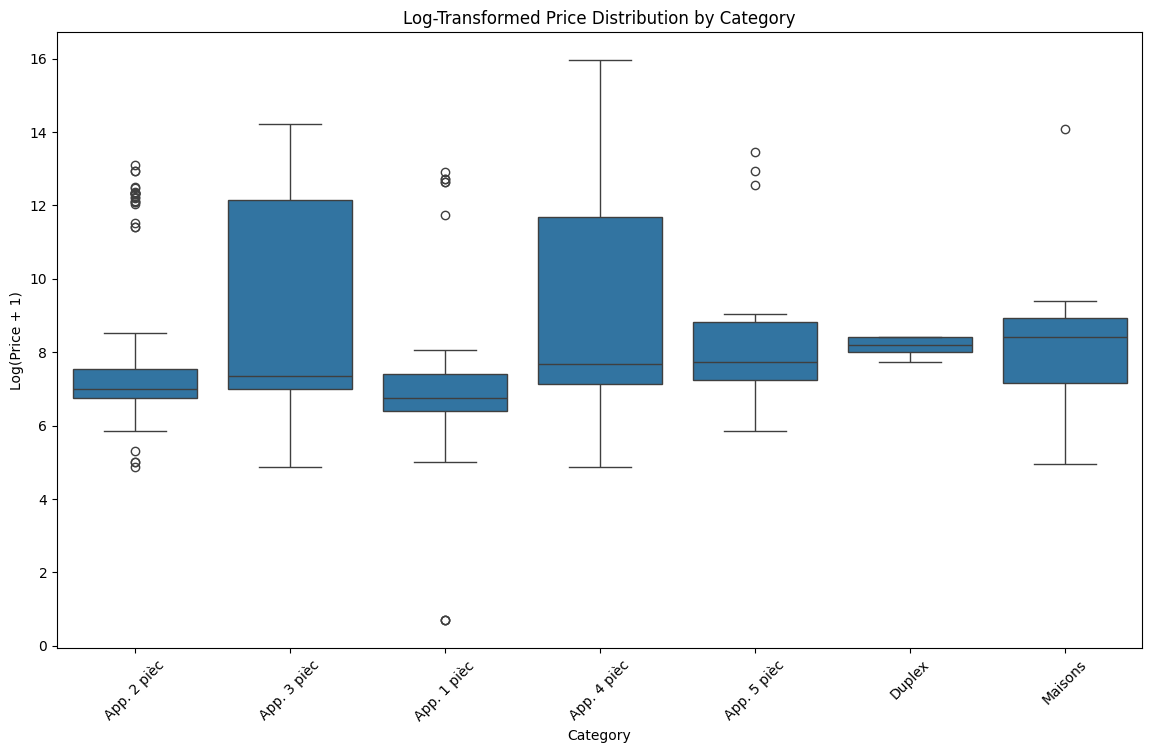

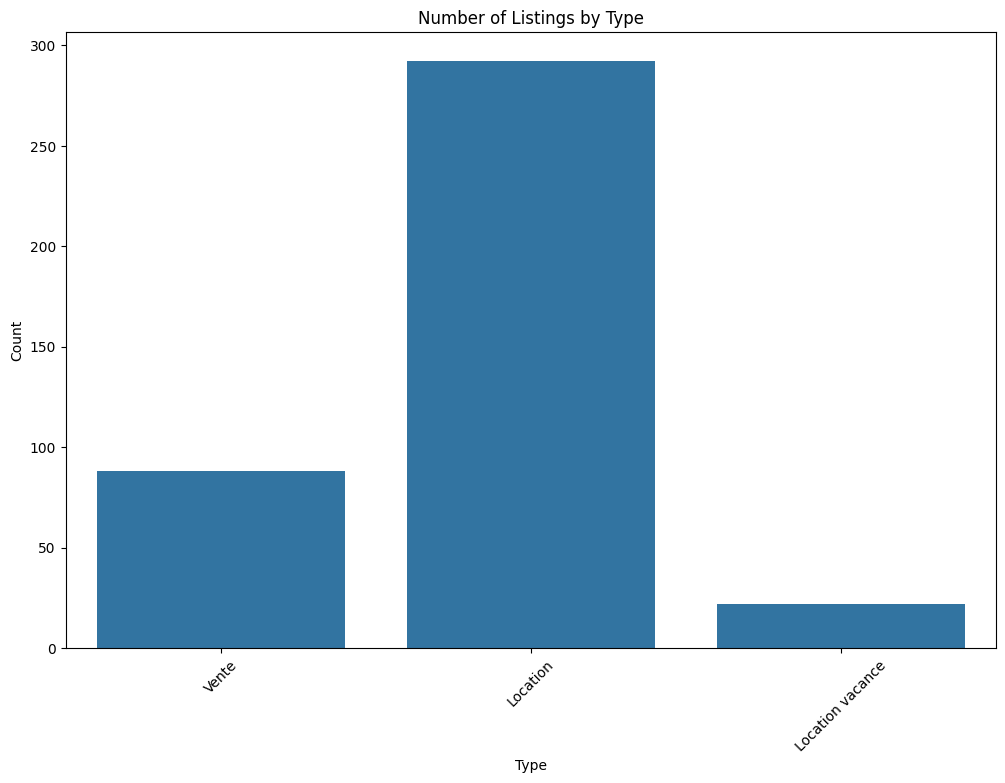

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
file_path = "Clean_data.csv"  # Chemin vers le fichier CSV
data = pd.read_csv(file_path)

# Convert relevant columns to numeric
data['Price'] = data['Price'].str.replace(' ', '').astype(float)
data['Surface'] = data['Surface'].astype(float)
data['Rooms'] = data['Rooms'].astype(int)

# Apply logarithm transformation on Price
data['Log_Price'] = np.log1p(data['Price'])

# Summary statistics for numerical features
print("Summary statistics for numerical features:")
print(data.describe())

# 1. Distribution of Prices (Log Transformation for better visualization)
plt.figure(figsize=(12, 6))
sns.histplot(data['Log_Price'], kde=True, bins=30, color='blue')
plt.title('Log-Transformed Distribution of House Prices')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap
numeric_columns = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(14, 10))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. Scatter Plot: Surface vs Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Surface', y='Log_Price', data=data, alpha=0.7)
plt.title('Log-Transformed House Price vs Surface')
plt.xlabel('Surface (m²)')
plt.ylabel('Log(Price + 1)')
plt.xlim(0, data['Surface'].max() + 50)  # Adjust x-axis to include all data
plt.ylim(0, data['Log_Price'].max() + 1)  # Adjust y-axis for better range
plt.show()

# 4. Scatter Plot: Rooms vs Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rooms', y='Log_Price', data=data, alpha=0.7)
plt.title('Log-Transformed Rooms vs Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Log(Price + 1)')
plt.xticks(range(data['Rooms'].min(), data['Rooms'].max() + 1))  # Show all room counts
plt.ylim(0, data['Log_Price'].max() + 1)  # Adjust y-axis
plt.show()

# 5. Boxplot: Price Distribution by Category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Log_Price', data=data)
plt.title('Log-Transformed Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Log(Price + 1)')
plt.xticks(rotation=45)
plt.show()

# 6. Countplot: Number of Listings by Type
plt.figure(figsize=(12, 8))
sns.countplot(x='Type', data=data)
plt.title('Number of Listings by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Unique locations count: 82
Non-null price entries: 402


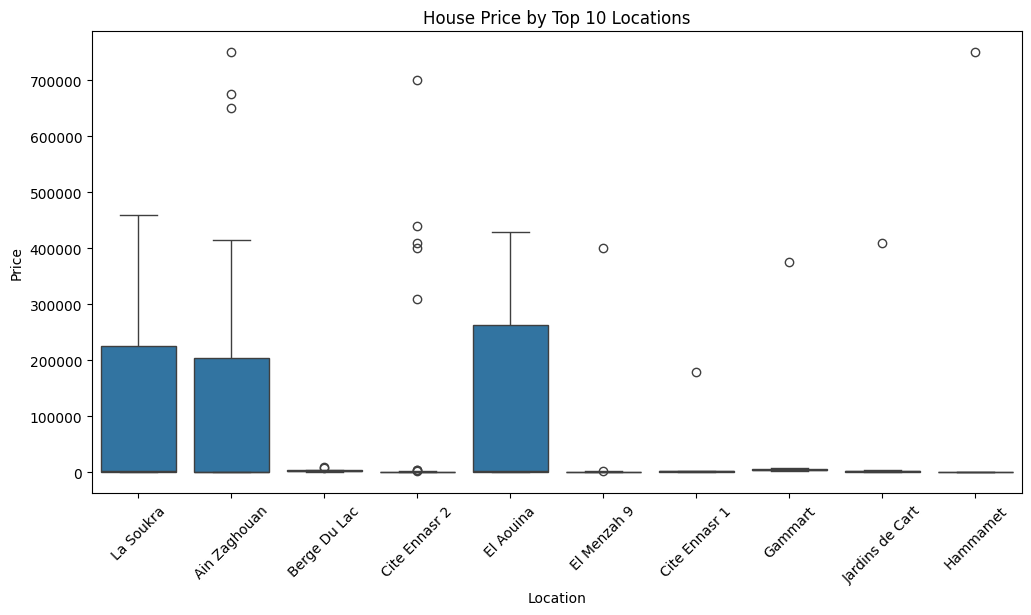

In [8]:
# 4. Box plots for categorical features (e.g., location)
if 'Location' in data.columns and 'Price' in data.columns:
    # Check for unique values in 'location' and non-null 'Price'
    print(f"\nUnique locations count: {data['Location'].nunique()}")
    print(f"Non-null price entries: {data['Price'].notnull().sum()}")

    # Reduce unique categories if necessary
    top_locations = data['Location'].value_counts().nlargest(10).index
    filtered_data = data[data['Location'].isin(top_locations)]

    # Check if filtered_data is empty
    if filtered_data.empty:
        print("\nFiltered data for top locations is empty. Ensure 'location' and 'Price' columns are populated.")
    else:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=filtered_data['Location'], y=filtered_data['Price'])
        plt.xticks(rotation=45)
        plt.title('House Price by Top 10 Locations')
        plt.xlabel('Location')
        plt.ylabel('Price')
        plt.show()
else:
    print("\nEither 'location' or 'Price' column is missing in the dataset.")


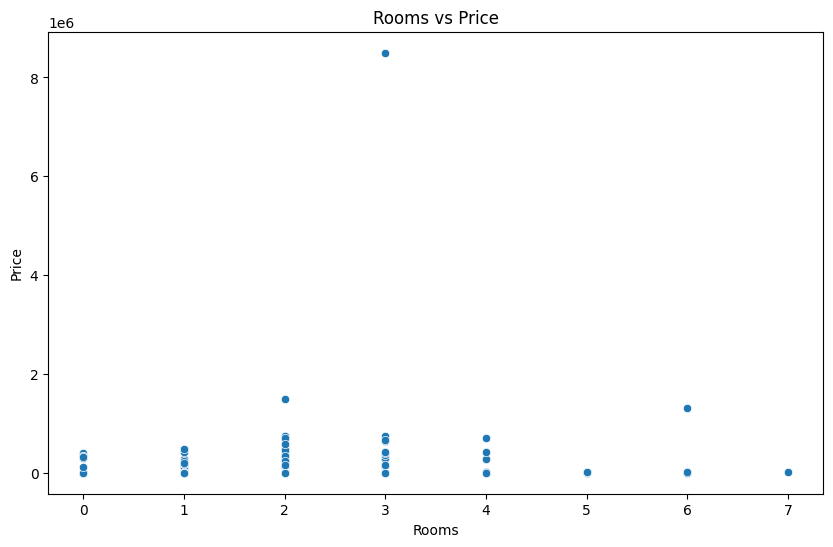

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rooms', y='Price', data=data)
plt.title('Rooms vs Price')
plt.show()


In [10]:
# Feature Analysis
# Identifying features with high correlation with the target variable
if 'Price' in correlation_matrix.columns:
    correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)
    print("\nFeatures with highest correlation to price:")
    print(correlation_with_price.head(10))
else:
    print("\nPrice column not included in correlation matrix (non-numeric or missing).")

# Missing values handling (if necessary)
# Example: Drop rows with missing target values
data = data.dropna(subset=['Price'])

# Summary insights
print("\nSummary Insights:")
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns after cleaning.")
print(f"Target variable 'Price' has a mean value of {data['Price'].mean():.2f}.")



Features with highest correlation to price:
Price        1.000000
Log_Price    0.442410
Rooms        0.084784
Surface      0.042474
Name: Price, dtype: float64

Summary Insights:
Dataset contains 402 rows and 9 columns after cleaning.
Target variable 'Price' has a mean value of 93364.50.
